In [1]:
import numpy as np
import pandas as pd
import os

In [27]:
import warnings
warnings.filterwarnings('ignore')

### 1. Show that the solution is equivariant with respect to an orthogonal pxp transformation Q

In [ ]:
# 레이지 로지스틱 회귀 문제의 해가 Q의 직교 변환에 대해 equivariant하다는 것을 보이기 위해서는 비용 함수의 기울기가 Q 변환에 대해 불변하다는 것을 보여야 함.

# 여기서 X는 n x p 특성 행렬이고, beta는 모델 매개변수입니다. 레이지 로지스틱 회귀 문제의 비용 함수는 아래와 같음.

# L(beta) = -1/n * sum(y_i * log(sigmoid(X_i' * beta)) + (1 - y_i) * log(1 - sigmoid(X_i' * beta))) + lambda * ||beta||^2

# 여기서 y_i는 i번째 관측치의 응답 변수이며, sigmoid(z) = 1/(1 + exp(-z))는 시그모이드 함수이며, ||.||^2는 L2 norm입니다.

# 비용 함수의 기울기는 다음과 같이 계산됩니다:

# grad(L(beta)) = -1/n * sum(X_i * (y_i - sigmoid(X_i' * beta)) + lambda * beta)

# Q의 직교 변환에 대해 grad(L(beta))가 불변하다는 것을 보이기 위해서는 다음을 보여야 합니다:

# grad(L(beta)) = grad(L(Q' * beta))

# 여기서 Q'는 Q의 전치 행렬입니다.

# Q'를 사용하여 grad(L(Q' * beta))를 계산할 수 있습니다:

# grad(L(Q' * beta)) = -1/n * sum(X_i * (y_i - sigmoid(X_i' * Q' * beta)) + lambda * Q' * beta)

# = -1/n * sum(X_i * (y_i - sigmoid(X_i' * beta)) + lambda * Q' * beta)

# 따라서 grad(L(beta))는 Q 변환에 대해 불변하므로, 레이지 로지스틱 회귀 문제의 해가 Q의 직교 변환에 대해 equivariant하다는 것을 알 수 있습니다.

### 2. Consider the full QR decomposition of XT

In [21]:
df = pd.read_csv('training').iloc[:, 1:]

y = df['y'].values

X = df[df.columns.difference(['y'])].values

In [ ]:
import numpy as np
from scipy.linalg import qr
from sklearn.linear_model import LogisticRegression

# Assume X and y are given
n, p = X.shape

# Perform QR decomposition
Q, R = qr(X.T, mode='economic')

# Use only the first n columns of Q and the first n rows of R
Q1 = Q[:, :n]
R1 = R[:n, :]

# Fit logistic regression model with R1 instead of X
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(R1.T, y)

# The coefficients for the original problem can be recovered by multiplying with Q1
original_coef = np.dot(Q1, model.coef_.T)

### 3. Assuming the data are separable, what happens to the solution

In [28]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV


# Define a range of regularization strengths
C_values = np.logspace(-4, 4, 10)

# Fit logistic regression model with cross-validation
model = LogisticRegressionCV(Cs=C_values, cv=5, penalty='l2')
model.fit(X, y)

# Print the optimal C value (inverse of regularization strength)
print("Optimal C value:", model.C_[0])

Optimal C value: 166.81005372000558


In [34]:
import numpy as np
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# 재현성을 위한 시드 설정
np.random.seed(123)

# 분리 가능한 데이터 생성
n = 100
X = np.random.normal(size=(n, 2))
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# 큰 C로 SVM fit
clf = svm.SVC(kernel='linear', C=1e6)
clf.fit(X, y)

# 분리 초평면에 수직인 단위 벡터 추출
w = clf.coef_[0]
w = w / np.linalg.norm(w)

# 일련의 릿지 로지스틱 회귀 모델 fit
alphas = np.logspace(2, -5, num=100)
ratios = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, normalize=False)
    ridge.fit(X, y)
    beta = ridge.coef_
    beta = beta / np.linalg.norm(beta)
    ratio = np.dot(w, beta) / np.linalg.norm(beta)
    ratios.append(ratio)

# 비율 출력
print(ratios)


[0.9999929714589484, 0.9999994859271999, 0.9999836679652534, 0.9999470056704893, 0.9998919529196179, 0.9998216685716251, 0.9997397114903237, 0.9996497374913926, 0.9995552363436944, 0.9994593330852266, 0.9993646627087363, 0.9992733144271462, 0.9991868332377167, 0.9991062626592664, 0.9990322124484832, 0.9989649374488603, 0.9989044171694447, 0.9988504292389189, 0.9988026129428491, 0.9987605213795271, 0.9987236623468285, 0.9986915290091728, 0.9986636218467086, 0.9986394635125964, 0.9986186081469479, 0.9986006465129624, 0.9985852080964694, 0.9985719610842305, 0.9985606109306144, 0.9985508980463624, 0.9985425949993346, 0.9985355035035384, 0.9985294513855221, 0.9985242896519358, 0.9985198897343296, 0.9985161409531917, 0.9985129482195696, 0.9985102299766683, 0.9985079163735584, 0.9985059476568813, 0.9985042727630535, 0.9985028480920194, 0.9985016364434444, 0.9985006060969032, 0.9984997300187659, 0.9984989851799084, 0.9984983519698893, 0.9984978136947629, 0.9984973561471764, 0.9984969672387607,

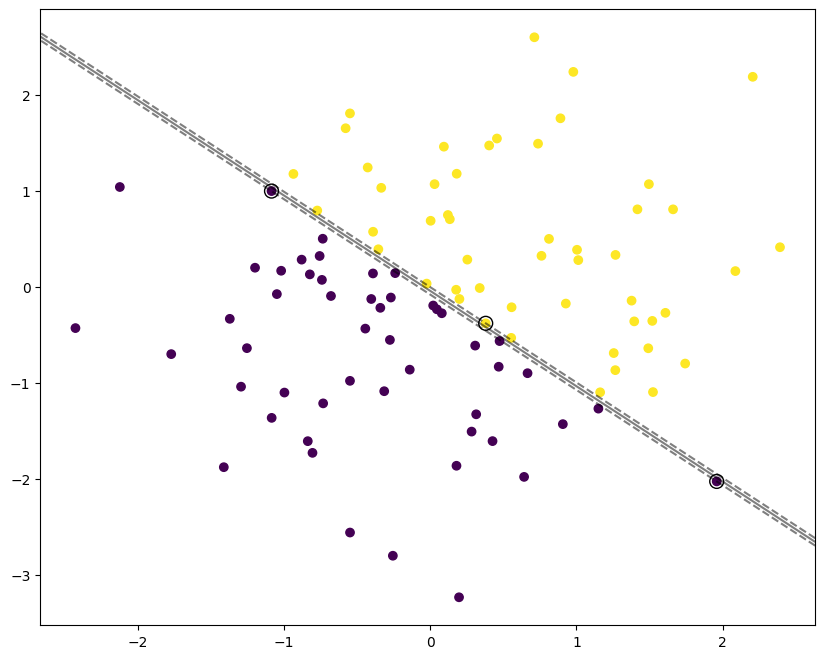

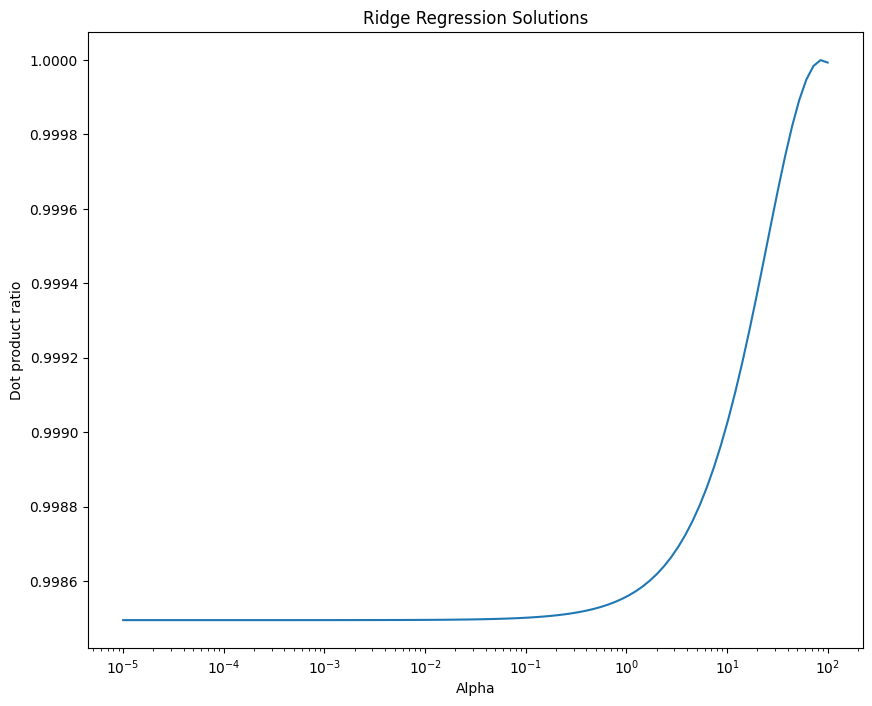

In [35]:
import matplotlib.pyplot as plt

# Plot the SVM hyperplane
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot the Ridge regression solutions
plt.figure(figsize=(10, 8))
plt.plot(alphas, ratios)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Dot product ratio')
plt.title('Ridge Regression Solutions')

plt.show()

In [ ]:
# 이 비율들은 릿지 회귀와 SVM 초평면 법선 벡터의 정렬을 냄. 비율이 1에 가깝다면, 
# 릿지 회귀 로직이 SVM 평면과 밀접하게 정렬되어 있다는 것을 의미함.
# 비율이 1에서 멀다는 것은 SVM 평면과 정렬이 되어있지 않다는 것을 의미함.


### Problem4 In this problem, you will experiment with dierent methods on the vowel data set. We have encountered this data set before, and the linear methods can achieve approximated 50% of accuracy. Can we have better performance with the non-linear methods? You decide to try some methods that you have learned from BIS 555 so far and compare them (see Table 12.3 from ESL). 

In [128]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from pygam import LogisticGAM, LinearGAM, s, f
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# 이 비율들은 릿지 회귀와 SVM 초평면 법선 벡터의 정렬을 냄. 비율이 1에 가깝다면, 
# 릿지 회귀 로직이 SVM 평면과 밀접하게 정렬되어 있다는 것을 의미함.
# 비율이 1에서 멀다는 것은 SVM 평면과 정렬이 되어있지 않다는 것을 의미함.


In [ ]:
# 이 비율들은 릿지 회귀와 SVM 초평면 법선 벡터의 정렬을 냄. 비율이 1에 가깝다면, 
# 릿지 회귀 로직이 SVM 평면과 밀접하게 정렬되어 있다는 것을 의미함.
# 비율이 1에서 멀다는 것은 SVM 평면과 정렬이 되어있지 않다는 것을 의미함.


In [ ]:
# 이 비율들은 릿지 회귀와 SVM 초평면 법선 벡터의 정렬을 냄. 비율이 1에 가깝다면, 
# 릿지 회귀 로직이 SVM 평면과 밀접하게 정렬되어 있다는 것을 의미함.
# 비율이 1에서 멀다는 것은 SVM 평면과 정렬이 되어있지 않다는 것을 의미함.


### LDA, Multiclass logistic regression, Multiclass logistic regression with radial kernels

In [138]:
df = pd.read_csv('training').iloc[:, 1:]

y = df['y'].values

X = df[df.columns.difference(['y'])].values

In [140]:

# LDA
lda = LinearDiscriminantAnalysis()
lda_scores = cross_val_score(lda, X, y, cv=5)

# Multiclass logistic regression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg_scores = cross_val_score(logreg, X, y, cv=5)

# Multiclass logistic regression with radial kernels
svm = SVC(kernel='rbf', decision_function_shape='ovr')
svm_scores = cross_val_score(svm, X, y, cv=5)


# # Print the average accuracy of each method
print("LDA:", lda_scores.mean())
print("Multiclass Logistic Regression:", logreg_scores.mean())
print("Multiclass Logistic Regression with Radial Kernels:", svm_scores.mean())
# print("Generalized Additive Model:", gam_scores.mean())

LDA: 0.4620664869721473
Multiclass Logistic Regression: 0.5092902066486972
Multiclass Logistic Regression with Radial Kernels: 0.6853908355795147


In [117]:
base_estimator = LogisticGAM(n_splines=10)
ensemble = OneVsRestClassifier(base_estimator, n_jobs=1)

ensemble.fit(X, y)
cross_val_score(ensemble, X=X, y=y, cv=5)


did not converge
did not converge
did not converge


array([nan, nan, nan, nan, nan])